## Lab 4: Debris Flows and Slope Stability Analysis (GEOG311)

### Due date: 21 February, 2017

### Objectives
 
Debris flows represent a significant natural hazard in BC. Although areas prone to activity can be determined through careful air-photo analysis and site visitation, determining the exact timing of failure is difficult. Since debris-flows and shallow landslide often occur following extreme precipitation events, real-time monitoring of precipitation events provides one method of hazard evaluation. This exercise considers methods of estimating the precipitation factors leading to debris-flow activity. It will also introduce methods of determining debris-flow velocity and peak discharge from deposits in the field. Finally, we will consider an assessment of slope stability using an infinite slope model and the Fellenius method of slices.  

### Background
 
 
#### Intensity and Duration of Precipitation 
 
Precipitation events are the most common trigger for debris-flow activity in alpine and mountain environments of British Columbia. Debris-flow often initiate from shallow, planar failures. This material can enter a gully or low-order stream, entrain additional material within the channel and may mobilize significant volumes of sediment. The climatological trigger for such events is rapid increase in pore-water pressure. This pore-water pressure increase occurs either during intense, low duration precipitation events (e.g. thunderstorms), or during storms of considerably long duration.  
 
Often a post-failure analysis of debris-flow activity requires the inspection of intensity, duration data for the precipitation event of question and a comparison to intensity-duration curves of a given return interval (e.g. the 5, 10, or 20-year event).  
 
#### Empirical Intensity-Duration Curve for Shallow Landsliding: **10 points** 
 
Caine (1989) compiled a data set of precipitation intensity and duration for storms known to have caused debris flows and shallow landslides. That data suggest a limiting-threshold of the form:
 
\begin{equation} 
I=14.82 \cdot D^{-0.39}\label{intendur} 
\end{equation}  
 
Where $I$ represents intensity ($mm \cdot hr^{-1}$) and $D$ is the storm duration (hr). The values 14.82 and -0.39 are empirically-derived coefficients (model parameters) and define the intercept and slope of the relation on a log-log plot.  This relation works moderately well for shallow failures ($<$ 2-3 m deep) and for storms between 10 minutes to 10 days. 
 
In BC, two noteworthy precipitation events in 1980 and 1984 triggered widespread debris flows in southwestern BC (Church et al., 1987). Your task is to examine whether the intensity/duration of these rain storms as recorded at nearby, representative rain gauges exceeded the limiting threshold for shallow landsliding as defined in equation 1. Do the following: 

1. Load the precipitation data (jan_1984.txt, dec_1980.txt) into Pandas in the way that we've done in the past. 
 
2. Calculate the storm intensity ($mm  \cdot hr^{-1}$) from the precipitation data (Duration in Hours, Depth in mm). 
 
3. Plot the intensity-duration curves for each storm using a log-log plot. Although called an 'intensity-duration' curve, make sure you plot duration as the independent variable.
 
4. Add Caine's empirical relation to the plot (use different color or line width so you can see it). 

5. Were the storms were of sufficient intensity or duration to initiate failures (i.e. does intensity-duration curve exceed the empirical threshold)? 


     Depth  Duration
0   3.8341    0.1667
1   5.0000    0.2500
2   9.0000    0.5000
3  12.0000    1.0000
4  24.0000    2.0000


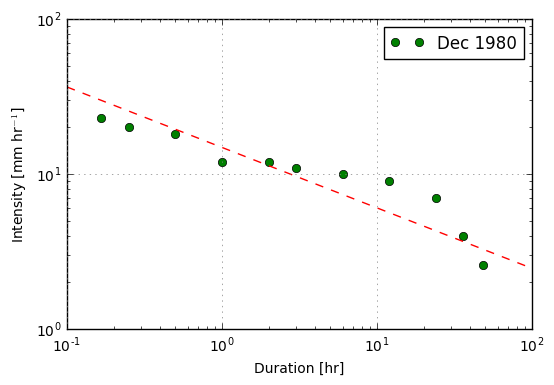

In [30]:
## import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Read in data file
dec80 = pd.read_csv('dec_1980.txt', delimiter = '\t')

## print first 5 rows to ensure data loaded correctly
print(dec80.head())

## make new variable intensity 
## dec80['Intensity'] = 

## make range of values between 0.1-100 hrs with step size of 0.05 hrs
## look at help for numpy function 'arange'
#syn_dur = 

## rewrite equation 1 below
## syn_int = 

## make plot 
plt.loglog(dec80['Duration'], dec80['Intensity'], 'go', 
           label='Dec 1980')

## add Caine's curve 
plt.plot(syn_dur, syn_int, '--r')

plt.grid(color='gray')
plt.xlabel('Duration [hr]')
plt.ylabel('Intensity [mm hr$^{-1}$]')
plt.legend(loc='upper right')

## save plot as pdf and then show in notebook
plt.savefig('int_dur_1980.pdf', resolution=600)
plt.show()

# Debris Flow Discharge and Velocity/Volume Estimates

Landslide hazards mapping and an assessment of the geomorphic significance of debris flows requires the calculation of debris flow volume or peak flow discharge ($Q_{max}$). Peak flow ($m^{3}s^{-1}$) estimates are often required for engineering purposes (e.g. 'design flows' for structures such as culvert and bridge crossings). Determination of total volume of a debris flow is required with constructing containment features for failed debris, or perhaps to estimate the contribution of failed sediments to downstream channels (e.g. fish habitat, channel aggradation). Estimates of $Q_{max}$ require not only the cross-sectional area of the flow, but also the velocity of the flowing material. Determination of flow velocity for floods can often be determined using Manning's Equation. Because debris flows do not behave as Newtonian materials, however, we require alternative methods.  
 
#### Run-up of Debris Flows
 
Run-up is the tendency for flowing earth materials (water, debris flows, or even lava) to deposit or 'run-up' higher on the upstream side of an object compared to the downstream side of an object. A good example of the process can be seen under bridges during high flows. On the upstream side of the piling, the water surface is deformed and tends to be higher than on the edges or downside side of the piling. For debris-flow deposits, the evidence of run-up is commonly observed as 'mud lines' on trees at the edge of the flow.  The faster the velocity, the greater the degree of run-up. If we assume conservation of energy, then the kinetic energy of the fluid ($\frac{1}{2} m \cdot u^{2}$) is transformed to potential energy ($mg\cdot \Delta h$). Equating the energy terms and solving for $u$ gives 
 
\begin{equation} 
\bar{u}=(2g \cdot \Delta h \cdot k)^{0.5} \label{runup} 
\end{equation} 
 
where $g$ is the acceleration due to gravity, and $\Delta$ h is the amount of run up on the up flow side of a protruding object (e.g. a tree or bridge piling), and $k$ is a constant. Assumptions required to use equation \ref{runup} is that flow is perpendicular to the object, the material behaves as Newtonian substance, and frictional losses of energy are negligible. Since the material is not Newtonian equation \ref{runup} over-predicts $\bar{u}$ and tends to run up more than would be expected for a true fluid. The over-prediction depends on the viscosity of the material and corrected by the coefficient $k$. Assume that $k$=0.5 for our project. 
 
 
#### Supra-elevational Effects
Supra-elevation is the difference in elevation ($\Delta$ h) between channel levee deposits as a debris flow 'banks' around a corner. Holding all other things constant, the greater the velocity of the flow, the larger $\Delta$ h becomes. We can measure $\Delta$ h and other morphometric elements from debris-flow deposits to derive an equation for the mean velocity of the surface material 
 
\begin{equation} 
\bar{u} =[k \cdot r_{c} \cdot g \cdot cos (\beta) \cdot tan(\delta)]^{0.5} \label{supra} 
\end{equation} 
 
where $k$ is the constant (0.5) applied to correct for rheological behavior, $r_{c}$ is the radius of curvature of the bend $\beta$ is the channel slope, and $\delta$ is the angle measuring the difference in elevation of the lev\'ees ($\Delta h$). If we know ($\Delta$ h) and channel width (W) then we can substitute $\frac{\Delta h}{W}$ into equation \ref{supra} for $\tan{(\delta)}$. 
 
 
#### Calculation of Peak Discharge ($Q_{max}$): **10 points** 
 
We can use equations \ref{runup} and \ref{supra} to determine the average velocity ($\bar{u}$) for a series of debris-flows deposits and observations of run up of debris. Combining $\bar{u}$ with the cross-sectional area of the flow, the peak discharge ($Q_{max}$) can be determined.  

Do the following: 

Load the two data sets (supra.txt and runup.txt). The 'supra.txt' consists of several surveyed cross sections through debris flow deposits located on the Sea-to-Sky highway (Route 99) from Hungr et al. (1984). Variables are Event number, Location, radius of curvature (Rc), channel slope (slope), elevation difference between levees ($\Delta h$), deposit width (W), and cross-sectional area ($m^{2}$). Use these data to determine flow velocity of the deposits and peak discharge ($m^{3}s^{-1}$)
 
 


In [29]:
## read in supra and runup

supra = pd.read_csv('supra.txt', delimiter = '\t')
runup = pd.read_csv('runup.txt', delimiter = '\t')



### Stability Analysis

\begin{figure}
\includegraphics{fb.jpg}\label{force_balance}  
\caption{Relation of driving and resisting forces on an infinite hillslope. From Sidle (2006)}
\end{figure}

An assessment of slope stability requires an evaluation of the driving and resisting forces. Failure occurs when the driving forces exceed the resisting forces or 
 
\begin{equation} 
F= \frac{\sum resisting forces}{\sum driving forces}\label{FS} 
\end{equation} 
 
where F is the factor of safety. If F exceeds one then the slope is
considered stable, whereas a value less than one suggests that 
failure is imminent.


Also recall that the normal (N) and Shear (S) forces ($kN$) are 
 
\begin{align} 
N = W \cdot \cos(\beta) \\ 
S = W \cdot \sin(\beta)  
\end{align} 
 
where $\beta$ is the slope angle and W is the weight of the soil/sediment mass. The total weight of the block ($W_{total}$) is the sum of the saturated and unsaturated components or  
 
\begin{equation} 
W_{total} = L \cdot (\gamma_{dry} \cdot z_{dry} + \gamma_{wet} \cdot z_{wet} )\label{Wtotal} 
\end{equation} 
 
where L is slope length (m) and $\gamma_{wet}$ and $\gamma_{dry}$ are the wet and dry unit weights of the soil block and $z_{wet}$ and $z_{dry}$ are thicknesses of the saturated and unsaturated soil block respectively. The pore pressure ($u$) at the base of the planar failure can be approximated by  
 
\begin{equation} 
u = \gamma_{water}\cdot z_{wet} \cdot \cos(\beta) \label{pp} 
\end{equation} 
 
 
Recall the Mohr-Colomb equation for shear strength 
 
\begin{equation} 
S = c' + (\sigma - u )tan(\phi')\label{MC} 
\end{equation}  
 
where the primes denote 'effective' or drained strength parameters. However, we need to multiply driving and resisting forces by the cosine of the slope angle to account for slope angle at the bottom and top of the soil block (consider Fig. \ref{FS} if this is unclear) so that for an infinite slope of unit width the force balance can be summarized by 
 
\begin{equation} 
F = \frac{c' + (W_{total}\cdot \cos^{2}(\beta) - u ) \cdot \tan{(\phi')} } {W_{total} \cdot \cos{\beta} \cdot \sin{\beta}} \label{infinite} 
\end{equation}  
 
Note that slope length (L) is not in equation \ref{infinite}. This is because L occurs in both the numerator and denominator so it cancels out. When F is smaller than unity, failure of a slope is imminent (or had occurred). Equation \ref{infinite} is known as the infinite slope stability model.  

#### Infinite Slope Calculation: **15 points**
 
Do the following: 
    
1. [10 points] Determine the elevation (m asl) of the water table (express as a depth BELOW the ground surface) required to cause failure of a hillslope with the following geotechnical properties, $\phi'=28^{\circ}$, $c'=29 kN m^{-2}$, $\gamma_{wet}= 22 kN m^{-3}$, $\gamma_{dry}= 15 kN m^{-3}$, $\gamma_{water}= 9.81 kN m^{-3}$, $\beta = 27^{\circ}$, $z = 12 m$. The elevation at a slide surface where a piezometer was installed is 770 m asl. 
     
2. [5 points] Simplify equation \ref{infinite} for a drained, cohesionless soil and explain its significance.

3. [EXTRA CREDIT:5 pts] Complete a sensitivity analysis to determine which variable ($\phi$, $\beta$, or $c'$) affects F greatest.
     
     
#### Fellenius method of slices: **10 points**

Failure in fine-grained sediments does not occur along a well-defined planar surface but instead the failure is rotational in nature. These types of materials have much higher cohesion values so that shear strength increases with depth. However, shear stresses increase at a faster rate than increases in strength and failure at depth commonly occurs. The curve-linear rupture surfaces does not allow equation \ref{infinite} to be employed but we can complete a force balance by dividing the hillslope into a number of slices and summing the total driving and resisting stresses according to  
 
\begin{equation} 
FS = \frac{ \sum_{i=1}^{i=n} c' \cdot{l} + (W_{total} \cdot \cos{\alpha} - u \cdot l )\cdot \tan{\phi'}} {\sum_{i=1}^{i=n} W_{total} \cdot \sin{\alpha} } \label{fellenius} 
\end{equation} 
 
where ($l$) represents the length ($m$) of a slice of the hillside of unit width and ($\alpha$) represents the bottom angle of the slice. These angles are defined by the intersection of a line drawn from the center of gravity of each slice downward and the radii of a circle (based on the slide's failure surface) positioned above the slide surface. 
 
Consider the large landslide centered in photos C1, C2 (Houston Tommy Creek) from the laboratory exercise of last week. Use the following data collected in the field (and measured in the lab) to determine the factor of safety (FS) for the landslide. Assume that the water table was 1.5 m below the ground surface (and flow was parallel to the slope) when failure occurred. The following geotechnical properties were determined for the material: $\gamma_{saturated}=27 kNm^{-3}$; $\gamma_{dry}= 16 kNm^{-3}$; $\phi'=23^{\circ}$; $c=65 kPa$. The average hillslope angle prior to failure was $\beta=24^{\circ}$. The following data were also collected for the landslide. Assume for simplicity that the area of a given slice can be approximated by the product of depth(h) and length(L). 

| Slice         | h [m]          | $\alpha^{\circ}$ | L (m)|
| ------------- |:--------------:|-----------------:|------|
|1 | 12 | 78 | 17.5 | 
|2 | 18 | 60 | 15.2  | 
|3 | 24 | 40 | 12.2  | 
|4 | 31 | 38 | 11.8  | 
|5 | 15.4 | 29 | 10.1 | 
|6 | 13.3 | 12 | 11.3  | 
|7 | 8.8 | 5 | 7.8  | 
|8 | 5.5 | 2 | 4.2 | 
|9 | 7   | -8 | 9  | 

Use the field-based data to determine the FS for the landslide using the Fellenius method of slices. Based on your results how reliable is the estimate of the water table at the time of failure ? 
 
**Extra Credit: 5 points**: Use the simplified Bishop method of slices to
determine FS. Show your function for full credit. Note the width of the slice (b) in the equation can be assumed to be a unit width (i.e. 1.0 m). 


\begin{equation}
F = \frac{\sum_{i=1}^{i=n}[ c\cdot b + ( W_{total}-u \cdot b) \cdot\tan(\phi)]\frac{1}{\cos(\beta) \cdot (1+ \frac{\tan(\beta)\cdot \tan(\phi)}{F})}}{{\sum_{i=1}^{i=n} W_{total}\cdot \sin(\beta)}}
\end{equation}



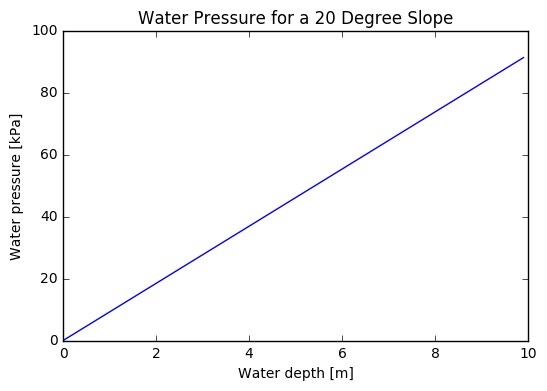

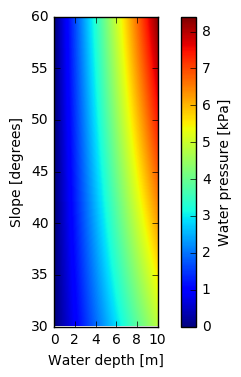

In [28]:
## One of the things that will make our life easy is the use of functions 
## In Python or most programming languages functions allow use to re-use code for tasks
## where we might need to do something often. Consider the situation where we might 
## want to make a function to calculate water pressure. 

def water_pres(h, beta):
    gamma_wat = 9.81 * 1000 ## unit weight of water 9.81 m s^-2 * 1000 kg m^-3 
    return (gamma_wat * h * np.cos(beta * np.pi/180))

## now for any water depth or slope angle we can plot how water pressure varies (e.g.)

h = np.arange(0, 10, 0.1)  ## make water depths from 0 to 10 with step size of 0.1 m

## calculate water pressure for a 20 degree slope with water depths of 0-10 m
wp = water_pres(h, 20) 
## convert to kPa
wp = wp/1000.

## plot it 
plt.plot(h, wp)
plt.title('Water Pressure for a 20 Degree Slope')
plt.xlabel('Water depth [m]')
plt.ylabel('Water pressure [kPa]')
plt.show()

## the nice thing about the use of functions is that is allows you 
## to also examine how a variable of interest varies as a function 
## of two dimensions maybe we want to see how water pressure varies 
## both for water depth AND slope

## the key to doing this is to make a 2D array of both water depths 
## and slopes first and then use these when calling our function.

## make a range of slopes that vary from 1 to 60 degrees with step 
## size of 0.1 degrees
slopes = np.arange(30, 60, 0.1)

## create 2D arrays using the numpy meshgrid function
h2d, slope2d, = np.meshgrid(h, slopes)

wp2d = water_pres(h2d, slope2d) 
wp2d = wp2d * 1e-04 ## convert to kPa
plt.imshow(wp2d, extent=[0,10,30,60]) ## xmin, xmax, ymin, ymax
plt.xlabel('Water depth [m]')
plt.ylabel('Slope [degrees]')
plt.colorbar(label = 'Water pressure [kPa]')
plt.show()

